# Введение #

Вспомните пример из предыдущего урока: Keras сохраняет историю потерь на обучающей и проверочной выборках по эпохам, пока обучает модель. В этом уроке мы научимся интерпретировать эти кривые обучения и использовать их для развития модели. В частности, мы рассмотрим кривые обучения на предмет *недообучения* и *переобучения* и разберём пару стратегий их исправления.

# Интерпретация кривых обучения #

Информацию в обучающих данных можно условно разделить на два вида: *сигнал* и *шум*. Сигнал — это часть, которая обобщается и помогает модели делать предсказания на новых данных. Шум — это то, что *верно только* для обучающих данных; это случайные колебания из реального мира или случайные, неинформативные закономерности, которые на самом деле не помогают модели делать предсказания. Шум может выглядеть полезным, но на деле им не является.

Мы обучаем модель, подбирая веса или параметры, минимизирующие потери на обучающей выборке. Однако, чтобы точно оценить качество модели, нужно проверять её на новом наборе данных — *валидационной* выборке. (Для обзора можно посмотреть наш урок по [валидации моделей](https://www.kaggle.com/dansbecker/model-validation) в курсе *Введение в машинное обучение*.)

Во время обучения мы строили график потерь на обучающей выборке по эпохам. Теперь добавим ещё и потери на валидационной выборке. Эти графики называются **кривыми обучения**. Чтобы эффективно обучать модели глубокого обучения, нужно уметь их интерпретировать.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/tHiVFnM.png" width="500" alt="График потерь на обучающей и валидационной выборках.">
<figcaption style="textalign: center; font-style: italic"><center>Валидационные потери дают оценку ожидаемой ошибки на невидимых данных.
</center></figcaption>
</figure>

Теперь, потери на обучающей выборке уменьшаются либо когда модель учит сигнал, либо когда она учит шум. Но валидационные потери уменьшаются только когда модель учит сигнал. (Какой бы шум модель ни выучила из обучающей выборки, он не обобщается на новые данные.) Поэтому, когда модель учит сигнал, обе кривые идут вниз, а когда учит шум, между кривыми появляется *разрыв*. Размер разрыва показывает, сколько шума выучила модель.

В идеале мы бы создавали модели, которые учат весь сигнал и не учат шум. Практически этого почти никогда не бывает. Вместо этого мы делаем компромисс. Можно заставить модель учить больше сигнала ценой изучения большего шума. Пока компромисс в нашу пользу, валидационные потери продолжают снижаться. Однако в какой-то момент компромисс может стать невыгодным, когда цена превышает пользу, и валидационные потери начинают расти.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/eUF6mfo.png" width="600" alt="Два графика. Слева — прямая через несколько точек, при этом истинная зависимость — парабола. Справа — кривая проходит через каждую точку, при этом истинная зависимость — парабола.">
<figcaption style="textalign: center; font-style: italic"><center>Недообучение и переобучение.
</center></figcaption>
</figure>

Этот компромисс показывает, что при обучении модели могут возникнуть две проблемы: слишком мало сигнала или слишком много шума. **Недообучение** обучающей выборки — это когда потери не настолько низки, как могли бы быть, потому что модель не выучила достаточно *сигнала*. **Переобучение** обучающей выборки — это когда потери не настолько низки, как могли бы быть, потому что модель выучила слишком много *шума*. Фокус в обучении моделей глубокого обучения — найти лучший баланс между этими двумя.

Мы рассмотрим пару способов извлечь больше сигнала из обучающих данных и при этом уменьшить количество шума.

# Емкость модели #

**Емкость** модели — это размер и сложность закономерностей, которые она способна выучить. Для нейронных сетей это в значительной степени определяется количеством нейронов и тем, как они соединены. Если кажется, что сеть недообучается, попробуйте увеличить её емкость.

Увеличить емкость сети можно, сделав её *шире* (больше нейронов в существующих слоях) или *глубже* (добавив больше слоёв). Более широкие сети проще изучают более линейные зависимости, тогда как более глубокие — более нелинейные. Что лучше — зависит от набора данных.

```
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

wider = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(1),
])

deeper = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])
```

В упражнении вы исследуете, как емкость сети влияет на её качество.

# Раннее прекращение обучения #

Мы упоминали, что когда модель слишком усердно учит шум, валидационные потери могут начать расти во время обучения. Чтобы этого избежать, можно просто остановить обучение, когда видно, что валидационные потери больше не уменьшаются. Такое прерывание обучения называется **ранним прекращением**.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/eP0gppr.png" width=500 alt="График кривых обучения с ранней остановкой в точке минимальных валидационных потерь; слева недообучение, справа переобучение.">
<figcaption style="textalign: center; font-style: italic"><center>Мы фиксируем модель там, где валидационные потери минимальны.
</center></figcaption>
</figure>

Как только мы обнаружим, что валидационные потери снова начинают расти, можно вернуть веса к состоянию, где минимум был достигнут. Это гарантирует, что модель не продолжит учить шум и переобучаться.

Обучение с ранней остановкой означает также, что мы меньше рискуем остановиться слишком рано, до того как сеть завершила изучение сигнала. Поэтому, помимо предотвращения переобучения из-за слишком долгого обучения, ранняя остановка может также предотвратить *недообучение* из-за слишком короткого обучения. Просто задайте большое число эпох (больше, чем потребуется), а ранняя остановка сделает всё остальное.

## Добавление ранней остановки ##

В Keras мы добавляем раннюю остановку в обучение через callback. **Callback** — это просто функция, которую нужно запускать время от времени, пока сеть обучается. Callback ранней остановки запускается после каждой эпохи. (В Keras есть [набор полезных callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks), но вы также можете [определять свои](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LambdaCallback).)


In [1]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

/Users/flexonafft/KaggleLearning/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Эти параметры говорят: «Если за последние 20 эпох не было улучшения валидационных потерь хотя бы на 0.001, то останови обучение и сохрани лучшую найденную модель». Иногда трудно понять, растут ли валидационные потери из‑за переобучения или это просто случайные колебания между батчами. Эти параметры позволяют задать допуски, определяющие момент остановки.

Как увидим в примере, мы передадим этот callback методу `fit` вместе с функцией потерь и оптимизатором.

# Пример — обучение модели с ранней остановкой #

Продолжим развивать модель из примера прошлого урока. Мы увеличим емкость сети и добавим callback ранней остановки, чтобы предотвратить переобучение.

Вот подготовка данных ещё раз.


In [2]:

import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('../dataset/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


Теперь увеличим емкость сети. Возьмём достаточно большую сеть, но будем полагаться на callback, чтобы остановить обучение, как только валидационные потери покажут признаки роста.


In [3]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

/Users/flexonafft/KaggleLearning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


После определения callback добавьте его в `fit` как аргумент (их может быть несколько, поэтому передайте список). При использовании ранней остановки выбирайте большое число эпох — больше, чем потребуется.


Minimum validation loss: 0.09014002233743668


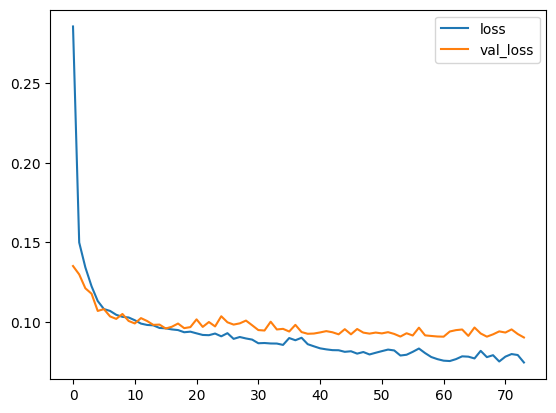

In [4]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

И действительно, Keras остановил обучение задолго до полного 500‑го числа эпох!

# Ваш ход #

Теперь [**предскажите, насколько популярна песня**](https://www.kaggle.com/kernels/fork/11906770) с набором данных *Spotify*.


---




*Есть вопросы или комментарии? Загляните на [форум обсуждения курса](https://www.kaggle.com/learn/intro-to-deep-learning/discussion), чтобы пообщаться с другими участниками.*
